# PART ONE: Data Wrangling  

_______________________________________________

## Gathering

_______________________________________________

In [1]:
# import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import tweepy

_______________________________________________

### Enhanced Twitter Archive: twitter_archive_df

> From WeRateDogs Twitter archive of 5000+ tweets, each tweet's text was used to programmatically extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive enhanced. Then tweets with no ratings were dropped so there are only 2356 rows remaining. However, these data may not be accurate abd should be assessed.

In [2]:
# load file to df
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

_______________________________________________

### Additional Data via the Twitter API: tweet_json_df

* Below is twitter_api.py or Twitter API code used to gather data from Twitter API for the project, which wasn't used. The code query each tweet ID and writes its JSON data to a tweet_json.txt file with each tweet's JSON data on its own line.

* Libraries used in this code includes: 
    1. tweetpy and its object "OAuthHandler"
    2. json
    3. default_timer from timeit


* Twitter API: I opt to use twitter data from local file named tweet_json.txt

In [3]:
tweet_json_df = pd.read_json('tweet_json.txt', lines = True)

In [4]:
tweet_json_df.to_csv('tweet_json.csv')

_______________________________________________

### Image Predictions File: image_predictions_df

> Every image in the WeRateDogs Twitter archive run through a neural network that can classify breeds of dogs. The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

In [5]:
import requests 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
filename = 'image-predictions.tsv'
with open(filename, 'wb') as f:
        f.write(response.content)

In [6]:
image_predictions_df = pd.read_csv('image-predictions.tsv', sep='\t')

_______________________________________________

## Assessing

_______________________________________________

### General
1. `twitter_archive_df` size is 2356, while `tweet_json_df` has 2354 (2 less rows) and `image_predictions_df` has 2075 (281 less rows)
2. all three df's are connected in `twitter_archive_df.tweet_id`, `tweet_json_df.id`, and `image_predictions_df.tweet_id`

_______________________________________________

### twitter_archive_df

_______________________________________________

#### Quality issues
##### Visually Assessment:
1. `name` column has non-standard lowercase values to be investigated programmatically 
2. < 1% of `rating_denominator` != 10.
3. < 2% of `rating_numerator` is > 14.
4. `source` column has the HTML tags, URL, and content all together.

##### Programmatic Assessment:
5.  `tweet_id` dtype is int (not str)
6. `timestamp` is in object format
7. `name` column contains 745 "None" values
8. `name` column contains 25 unique invalid lowercase names (total = 109 values) using regex search with str.contains.
9. `in_reply_to_status_id` and `in_reply_to_user_id` have only 78/2356 non-null values with 96.7% missing data
10. `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp` have only 181/2356 non-null values with 92% missing data
11. 380 rows only have dogs classified breed into four categories:
    * `doggo`
    * `floofer`
    * `pupper`
    * `puppo`

_______________________________________________

#### Tidiness issues

##### Programmatic Assessment:
1. The following columns is a subclass of `name` column:
    * `doggo`
    * `floofer`
    * `pupper`
    * `puppo`
2. The following columns concerning replies (out of scope):
    * `in_reply_to_status_id`
    * `in_reply_to_user_id`
3. The following columns concerning retweets (out of scope):
    * `retweeted_status_id`
    * `retweeted_status_user_id`
    * `retweeted_status_timestamp`

_______________________________________________

In [7]:
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
twitter_archive_df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [9]:
twitter_archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
93,874057562936811520,NaN,NaN,2017-06-12 00:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I can't believe this keeps happening. This, is...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/874057562...,12,10,None,None,None,None,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
716,783821107061198850,NaN,NaN,2016-10-06 00:08:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mairi. She has mastered the art of cam...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/783821107...,12,10,Mairi,None,None,None,None
1584,687096057537363968,NaN,NaN,2016-01-13 02:17:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper's New Year's resolution was to bec...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687096057...,11,10,None,None,None,pupper,None
247,845459076796616705,NaN,NaN,2017-03-25 02:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here's a heartwarming scene of ...,7.562885e+17,4.196984e+09,2016-07-22 00:43:32 +0000,https://twitter.com/dog_rates/status/756288534...,12,10,None,None,None,None,None


In [10]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
# twitter_archive_df.tweet_id column has unique values
twitter_archive_df.tweet_id.duplicated().any()

False

In [12]:
twitter_archive_df[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [13]:
twitter_archive_df.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
           ... 
Tessa         1
Ace           1
Kevon         1
Eugene        1
Sunshine      1
Name: name, Length: 957, dtype: int64

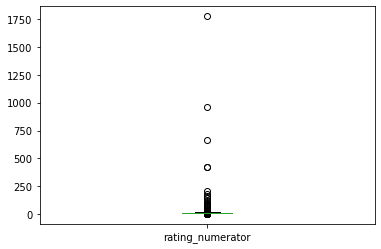

In [14]:
twitter_archive_df.rating_numerator.plot.box();

In [15]:
# percentage of rows where rating_numerator > 14
twitter_archive_df.query('rating_numerator > 14').shape[0]/twitter_archive_df.shape[0]*100

1.1884550084889642

I will assume that all data above are valid

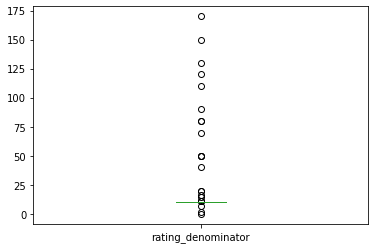

In [16]:
twitter_archive_df.rating_denominator.plot.box();

In [17]:
# percentage of rows where rating_denominator = 10
twitter_archive_df.query('rating_denominator == 10').shape[0]/twitter_archive_df.shape[0]*100

99.02376910016977

In [18]:
mask = twitter_archive_df.name.str.contains('^[a-z]', regex = True)
archive_lowercase_names = twitter_archive_df[mask]['name']
archive_lowercase_names_set = set(archive_lowercase_names)
archive_lowercase_names_list = list(archive_lowercase_names_set)
print(archive_lowercase_names_list)

['his', 'getting', 'by', 'actually', 'not', 'incredibly', 'one', 'very', 'space', 'light', 'all', 'a', 'mad', 'unacceptable', 'an', 'officially', 'life', 'my', 'such', 'this', 'quite', 'the', 'old', 'just', 'infuriating']


In [19]:
mask = twitter_archive_df.expanded_urls.isna()
twitter_archive_df[mask][['tweet_id','expanded_urls','rating_numerator', 'rating_denominator']].sample(5)

,tweet_id,expanded_urls,rating_numerator,rating_denominator
2149,669684865554620416,NaN,11,10
189,855860136149123072,NaN,666,10
1914,674330906434379776,NaN,13,10
30,886267009285017600,NaN,12,10
967,750381685133418496,NaN,13,10


In [20]:
classified_dogs_df = twitter_archive_df.query('doggo != "None" | floofer != "None" | pupper != "None" | puppo != "None"')
classified_dogs_df.shape[0]

380

In [21]:
twitter_archive_df.source[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

_______________________________________________

### tweet_json_df

_______________________________________________

#### Quality issues

##### Visually Assessment:
1. `id` dtype is int (not str)
2. Duplicated columns `id` and `id_str`
3. Note: `in_reply_to_status_id` and `in_reply_to_status_id_str` columns has the same values, e.g. duplicate 
4. Note: `in_reply_to_user_id` and `in_reply_to_user_id_str` columns has the same values, e.g. duplicate 
5. `favorited` column has two values: True and False
6. `retweeted` column has one value: False
7. `is_quote_status` if True refers to quoting tweets (irrelevant). 
8. `lang` column has 7 unique values

##### Programmatic Assessment:
9. `extended_entities` has 281 null values == missing rows in image predictions.
10. The following column has only (False) value:
    * `retweeted`
    * `truncated`
11. The following columns is out of interest as they concern quoted tweets:    
    * `quoted_status_id`
    * `quoted_status_id_str`
    * `quoted_status`
12. The following columns has almost empty data:
    * `geo` (empty)
    * `coordinates`
    * `place`
    * `contributors`
13. The following colums has 9 unique values yet with data dtype == object (not categorical)
    * `lang`
14. `retweeted_status` if notnull() refers to RT tweets (irrelevant)

_______________________________________________

#### Tidiness issues

##### Visually Assessment:
1. `source` column contains more than one data.

##### Programmatic Assessment:
2. The following columns concerning replies, retweets, likes, sensitivities, quotes, location, or languages which are out of scope:
    * `in_reply_to_status_id`
    * `in_reply_to_status_id_str`
    * `in_reply_to_user_id`
    * `in_reply_to_user_id_str`
    * `in_reply_to_screen_name`
    * `retweet_count`
    * `favorited`
    * `possibly_sensitive`
    * `ossibly_sensitive_appealable`
    * `retweeted_status`
3. 179 rows with non-null values of `retweeted_status` where also `favorite_count` == 0 vs. considerable number of retweets!

_______________________________________________

In [22]:
tweet_json_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [23]:
tweet_json_df.tail()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2353,2015-11-15 22:32:08+00:00,666020888022790149,666020888022790144,Here we have a Japanese Irish Setter. Lost eye...,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2535,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [24]:
tweet_json_df.sample(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
904,2016-07-26 20:47:17+00:00,758041019896193024,758041019896193024,Teagan reads entire books in store so they're ...,False,"[0, 116]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 758041011524427776, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,3001,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1351,2016-02-28 02:29:55+00:00,703769065844768768,703769065844768768,When you're trying to watch your favorite tv s...,False,"[0, 128]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 703769060060884992, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,3621,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2016,2015-12-02 19:44:43+00:00,672139350159835138,672139350159835136,This pup has a heart on its ass and that is do...,False,"[0, 94]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 672139344921149441, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1876,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1610,2016-01-08 04:46:13+00:00,685321586178670592,685321586178670592,This is Rocky. He sleeps like a psychopath. 10...,False,"[0, 93]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 685321578897354753, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2910,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
895,2016-07-29 15:27:55+00:00,759047813560868866,759047813560868864,This is Spencer. He's part of the Queen's Guar...,False,"[0, 84]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 759047798813712385, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,7227,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [25]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [26]:
# tweet_json_df.id column has unique id value
tweet_json_df.id.duplicated().any()

False

In [27]:
tweet_json_df.truncated.unique()

array([False])

In [28]:
tweet_json_df.lang.unique()

array(['en', 'und', 'in', 'eu', 'es', 'nl', 'tl', 'ro', 'et'],
      dtype=object)

In [29]:
sum(tweet_json_df.favorited)

8

In [30]:
sum(tweet_json_df.retweeted)

0

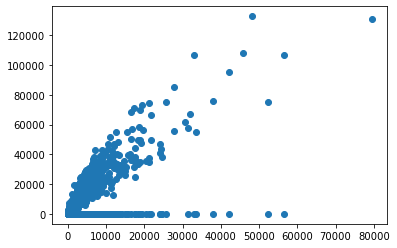

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(tweet_json_df.retweet_count,tweet_json_df.favorite_count)

In [32]:
# number of rows with favorite_count == 0
tweet_json_df.query('favorite_count == 0 & retweet_count != 0').shape[0]

179

In [33]:
len(tweet_json_df.lang.unique())

9

In [34]:
len(tweet_json_df.source.unique())

4

_______________________________________________

### image_predictions_df

_______________________________________________

#### Quality issues

##### Visually Assessment:
1. ...

##### Programmatic Assessment:
2. `jpg_url` has duplicated values (links to images) and consequently double entry, e.g. RT @dog_rates: 
3. `tweet_id` dtype is int (not str)

_______________________________________________

#### Tidiness issues
##### Visually Assessment:
1. `p1`, `p2`, and `p3` are not using standard format, e.g. some lowercase, other title case, some _ seperated or - or space

##### Programmatic Assessment:
2. Zero missing data but has 281 less rows

_______________________________________________

In [35]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [36]:
image_predictions_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [37]:
image_predictions_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2050,887343217045368832,https://pbs.twimg.com/ext_tw_video_thumb/88734...,1,Mexican_hairless,0.330741,True,sea_lion,0.275645,False,Weimaraner,0.134203,True
1508,785872687017132033,https://pbs.twimg.com/ext_tw_video_thumb/78587...,1,Great_Pyrenees,0.392108,True,golden_retriever,0.198358,True,Pekinese,0.143328,True
26,666373753744588802,https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg,1,soft-coated_wheaten_terrier,0.326467,True,Afghan_hound,0.259551,True,briard,0.206803,True
338,672239279297454080,https://pbs.twimg.com/media/CVRGDrsWsAAUWSF.jpg,1,pug,0.332536,True,French_bulldog,0.258124,True,bull_mastiff,0.120873,True
117,668142349051129856,https://pbs.twimg.com/media/CUW37BzWsAAlJlN.jpg,1,Angora,0.918834,False,hen,0.037793,False,wood_rabbit,0.011015,False


In [38]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [39]:
# image_predictions_df.tweet_id has unique values
image_predictions_df.tweet_id.duplicated().any()

False

In [40]:
image_predictions_df.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [41]:
image_predictions_df.jpg_url.duplicated()
image_predictions_df[~image_predictions_df.jpg_url.duplicated()].jpg_url.sort_values()

462     https://pbs.twimg.com/ext_tw_video_thumb/67480...
480     https://pbs.twimg.com/ext_tw_video_thumb/67535...
495     https://pbs.twimg.com/ext_tw_video_thumb/67574...
528     https://pbs.twimg.com/ext_tw_video_thumb/67677...
539     https://pbs.twimg.com/ext_tw_video_thumb/67695...
                              ...                        
320     https://pbs.twimg.com/tweet_video_thumb/CVKtH-...
815     https://pbs.twimg.com/tweet_video_thumb/CZ0mhd...
1033    https://pbs.twimg.com/tweet_video_thumb/CeBym7...
1037    https://pbs.twimg.com/tweet_video_thumb/CeGGkW...
1475    https://pbs.twimg.com/tweet_video_thumb/CtTFZZ...
Name: jpg_url, Length: 2009, dtype: object

In [42]:
image_predictions_df.query('jpg_url == "https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg" ')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1155,733109485275860992,https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg,1,golden_retriever,0.945523,True,Labrador_retriever,0.042319,True,doormat,0.003956,False
1446,775898661951791106,https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg,1,golden_retriever,0.945523,True,Labrador_retriever,0.042319,True,doormat,0.003956,False


In [43]:
# number of times all predictions 1, 2, and 3 were False
image_predictions_df.query('p1_dog == False & p2_dog == False & p3_dog == False').shape[0]

324

In [44]:
# number of times all predictions were True
all_true_prediction_df = image_predictions_df[image_predictions_df.p1_dog & image_predictions_df.p2_dog & image_predictions_df.p3_dog]
all_true_prediction_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [45]:
p1_true = image_predictions_df.query('p1_dog == True').p1.unique()
p2_true = image_predictions_df.query('p2_dog == True').p2.unique()
p3_true = image_predictions_df.query('p3_dog == True').p3.unique()

In [46]:
# A set of all True predictions
true_predictions_set = set(list(p1_true) + list(p2_true) + list(p3_true))
true_predictions_set;

In [47]:
len(true_predictions_set)

118

In [48]:
all_true_prediction_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [49]:
image_predictions_df.jpg_url.value_counts()

https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg                                            2
https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg    2
https://pbs.twimg.com/media/CwiuEJmW8AAZnit.jpg                                            2
https://pbs.twimg.com/media/CiibOMzUYAA9Mxz.jpg                                            2
                                                                                          ..
https://pbs.twimg.com/media/CVRVvRMWEAIBKOP.jpg                                            1
https://pbs.twimg.com/media/Cmjlsh1XgAEvhq_.jpg                                            1
https://pbs.twimg.com/media/CeHg1klW8AE4YOB.jpg                                            1
https://pbs.twimg.com/media/CfxcKU6W8AE-wEx.jpg                                            1
https://pbs.twimg.com/media/CsfLUDbXEAAu0VF.jpg                       

In [50]:
image_predictions_df.query('jpg_url == "https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
327,671896809300709376,https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg,1,chow,0.243529,True,hamster,0.22715,False,Pomeranian,0.056057,True
1591,798665375516884993,https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg,1,chow,0.243529,True,hamster,0.22715,False,Pomeranian,0.056057,True


In [51]:
tweet_json_df.query('id == 798665375516884993')

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
600,2016-11-15 23:13:58+00:00,798665375516884993,798665375516884992,RT @dog_rates: This is Lola. She fell asleep o...,False,"[0, 119]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 671896801591607296, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,0.0,0.0,en,{'created_at': 'Wed Dec 02 03:40:57 +0000 2015...,NaN,NaN,NaN


_______________________________________________

## Cleaning

In [52]:
# Create copies for cleaning
twitter_archive_df_clean = twitter_archive_df.copy()
tweet_json_df_clean = tweet_json_df.copy()
image_predictions_df_clean = image_predictions_df.copy()

_________________________

### Pre-cleaning DFs

In [53]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [54]:
tweet_json_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [55]:
image_predictions_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


_____________________

### twitter_archive_df_clean

* Define

Convert `tweet_id` to str.

* Code

In [56]:
twitter_archive_df_clean.tweet_id = twitter_archive_df_clean.tweet_id.astype(str)

* Test

In [57]:
twitter_archive_df_clean.tweet_id.dtype

dtype('O')

Convert `timestamp` to str.

* Code

In [58]:
twitter_archive_df_clean['timestamp'] = pd.to_datetime(twitter_archive_df_clean['timestamp'])

* Test

In [59]:
twitter_archive_df_clean.timestamp.dtype

datetime64[ns, UTC]

In [60]:
twitter_archive_df_clean.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
835,768193404517830656,NaN,NaN,2016-08-23 21:09:14+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Gerald. He's a fairly exotic doggo. Floof...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/768193404...,8,10,Gerald,doggo,None,None,None


* Define

rename invalid lowercase names to None

* Code

In [61]:
# Loop to replace each non standard name (non_name).
for index in archive_lowercase_names_list:
    twitter_archive_df_clean.name.replace(index,
                              "None",
                              inplace = True)

* Test

In [62]:
# Based on the list of non-standard names. Let's ensure if all have been removed.
sum(twitter_archive_df_clean.name.isin(archive_lowercase_names_list))

0

* Define

remove rows with `rating_denominator` != 10 or `rating_numerator` > 14.

* Code

In [63]:
twitter_archive_df_clean = twitter_archive_df_clean.query('rating_numerator <= 14 & rating_denominator == 10')

* Test

In [64]:
twitter_archive_df_clean.query('rating_numerator > 14 | rating_denominator != 10').shape[0]

0

* Define

source column has the HTML tags, URL, and content all together.

* Code

In [65]:
# Creating auxiliary list to store the source and source_url.
source = []
source_url = [] 

# This loop will remove all HTML tags using .split() and indexing.
for index in twitter_archive_df_clean.source:
    source.append(index.split('</a')[0].split('<a href="')[1].split('" rel="nofollow">')[1] )
    source_url.append(index.split('</a')[0].split('<a href="')[1].split('" rel="nofollow">')[0] )

# Updating the source column with source.
twitter_archive_df_clean.source = source

# Appending a new column with source_url info.
twitter_archive_df_clean = pd.concat([twitter_archive_df_clean, pd.DataFrame(source_url, columns = ['source_url'])], axis = 1)

* Test

In [66]:
twitter_archive_df_clean[['tweet_id','source', 'source_url']].head()

,tweet_id,source,source_url
0,892420643555336193,Twitter for iPhone,http://twitter.com/download/iphone
1,892177421306343426,Twitter for iPhone,http://twitter.com/download/iphone
2,891815181378084864,Twitter for iPhone,http://twitter.com/download/iphone
3,891689557279858688,Twitter for iPhone,http://twitter.com/download/iphone
4,891327558926688256,Twitter for iPhone,http://twitter.com/download/iphone


In [67]:
# reindex columns
column_names = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'source_url','text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_df_clean = twitter_archive_df_clean.reindex(columns=column_names)

* Define

text column has both texts and urls which should be seperated into two columns

* Code

In [68]:
twitter_archive_df_clean["text_url"] = twitter_archive_df_clean["text"].str.split()[0][-1]
twitter_archive_df_clean["text"] = twitter_archive_df_clean["text"].str.replace(r'https?://[^\s<>"]+|www\.[^\s<>"]+', "")

* Test

In [69]:
twitter_archive_df_clean['text_url']

0       https://t.co/MgUWQ76dJU
1       https://t.co/MgUWQ76dJU
2       https://t.co/MgUWQ76dJU
3       https://t.co/MgUWQ76dJU
4       https://t.co/MgUWQ76dJU
                 ...           
2351    https://t.co/MgUWQ76dJU
2352    https://t.co/MgUWQ76dJU
2353    https://t.co/MgUWQ76dJU
2354    https://t.co/MgUWQ76dJU
2355    https://t.co/MgUWQ76dJU
Name: text_url, Length: 2355, dtype: object

In [70]:
twitter_archive_df_clean['text']

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
                              ...                        
2351    Here we have a 1949 1st generation vulpix. Enj...
2352    This is a purebred Piers Morgan. Loves to Netf...
2353    Here is a very happy pup. Big fan of well-main...
2354    This is a western brown Mitsubishi terrier. Up...
2355    Here we have a Japanese Irish Setter. Lost eye...
Name: text, Length: 2355, dtype: object

In [71]:
# Re-arrange columns
twitter_archive_df_clean = twitter_archive_df_clean[['tweet_id',
                                                     'in_reply_to_status_id',
                                                     'in_reply_to_user_id',
                                                     'timestamp',
                                                     'source',
                                                     'source_url',
                                                     'text',
                                                     'text_url',
                                                     'retweeted_status_id',
                                                     'retweeted_status_user_id',
                                                     'retweeted_status_timestamp',
                                                     'expanded_urls',
                                                     'rating_numerator',
                                                     'rating_denominator',
                                                     'name',
                                                     'doggo',
                                                     'floofer',
                                                     'pupper',
                                                     'puppo']]

* Define

remove the following five columns:
1. in_reply_to_status_id
2. in_reply_to_user_id
3. retweeted_status_id
4. retweeted_status_user_id
5. retweeted_status_timestamp

* Code

In [72]:
columns = ['in_reply_to_status_id',
           'in_reply_to_user_id'
           ,'retweeted_status_id',
           'retweeted_status_user_id',
           'retweeted_status_timestamp']
twitter_archive_df_clean.drop(columns=columns , inplace=True)

* Test

In [73]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2355 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2321 non-null   object             
 1   timestamp           2321 non-null   datetime64[ns, UTC]
 2   source              2321 non-null   object             
 3   source_url          2321 non-null   object             
 4   text                2321 non-null   object             
 5   text_url            2355 non-null   object             
 6   expanded_urls       2271 non-null   object             
 7   rating_numerator    2321 non-null   float64            
 8   rating_denominator  2321 non-null   float64            
 9   name                2321 non-null   object             
 10  doggo               2321 non-null   object             
 11  floofer             2321 non-null   object             
 12  pupper              2321 non-null 

* Define

merge the following columns under one column:
* `doggo`,
* `floofer`,
* `pupper`,
* `puppo`

* Code

In [74]:
# check before
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2355 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2321 non-null   object             
 1   timestamp           2321 non-null   datetime64[ns, UTC]
 2   source              2321 non-null   object             
 3   source_url          2321 non-null   object             
 4   text                2321 non-null   object             
 5   text_url            2355 non-null   object             
 6   expanded_urls       2271 non-null   object             
 7   rating_numerator    2321 non-null   float64            
 8   rating_denominator  2321 non-null   float64            
 9   name                2321 non-null   object             
 10  doggo               2321 non-null   object             
 11  floofer             2321 non-null   object             
 12  pupper              2321 non-null 

In [75]:
dog_cols = twitter_archive_df_clean[['doggo','floofer','pupper','puppo']]
dog_cols.replace(to_replace=['None'], value='', inplace=True)


dogtionary = np.array(dog_cols['doggo']) + np.array(dog_cols['floofer']) + np.array(dog_cols['pupper']) + np.array(dog_cols['puppo'])

dogtionary_df = pd.DataFrame(dogtionary, columns = ['dogtionary'])
dogtionary_df.dogtionary.value_counts()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


                1942
pupper           244
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: dogtionary, dtype: int64

* assign rows with multiple values to multiclass

In [76]:
dogtionary[dogtionary == 'doggopupper'] = 'multiclass'
dogtionary[dogtionary == 'doggopuppo'] = 'multiclass'
dogtionary[dogtionary == 'doggofloofer'] = 'multiclass'

# replace '' by NaN
dogtionary_df.replace(to_replace=[''], value=np.nan, inplace=True)

# Test
dogtionary_df.dogtionary.value_counts()

pupper        244
doggo          83
puppo          29
multiclass     14
floofer         9
Name: dogtionary, dtype: int64

In [77]:
twitter_archive_df_clean.reset_index(drop=True, inplace=True)
twitter_archive_df_clean = pd.concat([twitter_archive_df_clean, dogtionary_df], axis = 1)

In [78]:
twitter_archive_df_clean.sample()

,tweet_id,timestamp,source,source_url,text,text_url,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dogtionary
1404,699370870310113280,2016-02-15 23:13:03+00:00,Twitter for iPhone,http://twitter.com/download/iphone,Say hello to Calbert. He doesn't have enough l...,https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/699370870...,11.0,10.0,Calbert,None,None,None,None,NaN


In [79]:
list(twitter_archive_df_clean.columns)

['tweet_id',
 'timestamp',
 'source',
 'source_url',
 'text',
 'text_url',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'dogtionary']

In [80]:
columns = ['doggo',
 'floofer',
 'pupper',
 'puppo',]
twitter_archive_df_clean.drop(columns = columns, axis=1, inplace=True)

* Test

In [81]:
# check after
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2355 entries, 0 to 2354
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2321 non-null   object             
 1   timestamp           2321 non-null   datetime64[ns, UTC]
 2   source              2321 non-null   object             
 3   source_url          2321 non-null   object             
 4   text                2321 non-null   object             
 5   text_url            2355 non-null   object             
 6   expanded_urls       2271 non-null   object             
 7   rating_numerator    2321 non-null   float64            
 8   rating_denominator  2321 non-null   float64            
 9   name                2321 non-null   object             
 10  dogtionary          379 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(2), object(8)
memory usage: 202.5+ KB


* Define

Remove rows where `expanded_urls` isna() as they miss images and could confuse our analysis

* Code

In [82]:
mask = twitter_archive_df_clean.expanded_urls.notnull()
twitter_archive_df_clean = twitter_archive_df_clean[mask]

* Test

In [83]:
twitter_archive_df_clean.expanded_urls.isna().any()

False

In [84]:
# final cleaned df
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2271 entries, 0 to 2354
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2271 non-null   object             
 1   timestamp           2271 non-null   datetime64[ns, UTC]
 2   source              2271 non-null   object             
 3   source_url          2237 non-null   object             
 4   text                2271 non-null   object             
 5   text_url            2271 non-null   object             
 6   expanded_urls       2271 non-null   object             
 7   rating_numerator    2271 non-null   float64            
 8   rating_denominator  2271 non-null   float64            
 9   name                2271 non-null   object             
 10  dogtionary          373 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(2), object(8)
memory usage: 212.9+ KB


__________________________

### tweet_json_df_clean

* Define

convert `id` dtype to object (string)
convert `lang` dtype to category

* Code

In [85]:
tweet_json_df_clean.id = tweet_json_df_clean.id.astype(str)

In [86]:
tweet_json_df_clean["lang"] = tweet_json_df_clean["lang"].astype('category')

* Test

In [87]:
tweet_json_df_clean.id.dtype

dtype('O')

In [88]:
tweet_json_df_clean["lang"].dtype

CategoricalDtype(categories=['en', 'es', 'et', 'eu', 'in', 'nl', 'ro', 'tl', 'und'], ordered=False)

* Define

remove rows where `is_quote_status` is True

* Code

In [89]:
tweet_json_df_clean = tweet_json_df_clean[~tweet_json_df_clean.is_quote_status]

* Test

In [90]:
tweet_json_df_clean.is_quote_status.sum()

0

* Define

remove rows with `retweeted_status` notnull

In [91]:
tweet_json_df_clean = tweet_json_df_clean[tweet_json_df_clean.retweeted_status.isnull()]

* Test

In [92]:
tweet_json_df_clean.retweeted_status.notnull().sum()

0

* Define

Remove the following columns:
* `id_str`, duplicate of `id`
* `truncated`, useless (always False)
* `in_reply_to_status_id`, irrelevant 
* `in_reply_to_status_id_str`, irrelevant 
* `in_reply_to_user_id`, irrelevant 
* `in_reply_to_user_id_str`, irrelevant 
* `in_reply_to_screen_name`, irrelevant 
* `geo`, irrelevant 
* `coordinates`, irrelevant 
* `place`, irrelevant 
* `contributors`, irrelevant 
* `favorited` , irrelevant 
* `retweeted` , always False
* `possibly_sensitive`, irrelevant 
* `possibly_sensitive_appealable`, irrelevant 
* `quoted_status_id`, irrelevant 
* `quoted_status_id_str`, irrelevant 
* `quoted_status` irrelevant 

* Code

In [93]:
columns = ['id_str',
           'truncated',
           'in_reply_to_status_id',
           'in_reply_to_status_id_str',
           'in_reply_to_user_id',
           'in_reply_to_user_id_str',
           'in_reply_to_screen_name',
           'geo',
           'coordinates',
           'place',
           'contributors',
           'favorited',
           'retweeted',
           'possibly_sensitive',
           'possibly_sensitive_appealable',
           'quoted_status_id',
           'quoted_status_id_str',
           'quoted_status',
           'retweeted_status']
tweet_json_df_clean.drop(columns=columns, inplace=True)

* Test

In [94]:
tweet_json_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2146 entries, 0 to 2353
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          2146 non-null   datetime64[ns, UTC]
 1   id                  2146 non-null   object             
 2   full_text           2146 non-null   object             
 3   display_text_range  2146 non-null   object             
 4   entities            2146 non-null   object             
 5   extended_entities   1994 non-null   object             
 6   source              2146 non-null   object             
 7   user                2146 non-null   object             
 8   is_quote_status     2146 non-null   bool               
 9   retweet_count       2146 non-null   int64              
 10  favorite_count      2146 non-null   int64              
 11  lang                2146 non-null   category           
dtypes: bool(1), category(1), datetime6

* Define

remove rows when extended_entities isna() as they contain no images

* Code

In [95]:
mask = tweet_json_df_clean.extended_entities.isna()
tweet_json_df_clean = tweet_json_df_clean[~mask]

* Test

In [96]:
tweet_json_df_clean.extended_entities.isna().any()

False

* Define

rename id to tweet_id to match the other dataframes header

* Code

In [97]:
tweet_json_df_clean.rename(columns={'id':'tweet_id'}, inplace= True)

* Test

In [98]:
#final cleaned df
tweet_json_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2353
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          1994 non-null   datetime64[ns, UTC]
 1   tweet_id            1994 non-null   object             
 2   full_text           1994 non-null   object             
 3   display_text_range  1994 non-null   object             
 4   entities            1994 non-null   object             
 5   extended_entities   1994 non-null   object             
 6   source              1994 non-null   object             
 7   user                1994 non-null   object             
 8   is_quote_status     1994 non-null   bool               
 9   retweet_count       1994 non-null   int64              
 10  favorite_count      1994 non-null   int64              
 11  lang                1994 non-null   category           
dtypes: bool(1), category(1), datetime6

__________________________________

### image_predictions_df_clean

* Define

Convert `tweet_id` to str (object / O).

* Code

In [99]:
image_predictions_df_clean.tweet_id = image_predictions_df_clean.tweet_id.astype(str)

* Test

In [100]:
image_predictions_df_clean.tweet_id.dtype

dtype('O')

* Define

jpg_url has duplicated values (links to images) and consequently double entry, e.g. RT @dog_rates:

In [101]:
image_predictions_df_clean.jpg_url.duplicated().any()

True

* Code

In [102]:
image_predictions_df_clean.drop_duplicates(subset ="jpg_url", 
                     keep = False, inplace = True)

* Test

In [103]:
image_predictions_df_clean.jpg_url.duplicated().any()

False

* Define

standarize `p1`, `p2`, `p3` names to one lower case seperated by '_' standard format

* Code

In [104]:
image_predictions_df_clean[['p1','p2','p3']] = image_predictions_df_clean[['p1','p2','p3']].apply(lambda x: x.astype(str).str.lower().replace(' ','_').replace('-','_'))

* Test

In [105]:
image_predictions_df_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
30,666418789513326592,https://pbs.twimg.com/media/CT-YWb7U8AA7QnN.jpg,1,toy_terrier,0.149680,True,papillon,0.148258,True,chihuahua,0.142860,True
1644,808106460588765185,https://pbs.twimg.com/media/Czb4iFRXgAIUMiN.jpg,1,golden_retriever,0.426183,True,labrador_retriever,0.257447,True,great_pyrenees,0.126482,True
192,669567591774625800,https://pbs.twimg.com/media/CUrIK1DWoAAhECq.jpg,1,chihuahua,0.980511,True,toy_terrier,0.009166,True,miniature_pinscher,0.002659,True
250,670691627984359425,https://pbs.twimg.com/media/CU7GehOUYAA9nn-.jpg,1,shetland_sheepdog,0.071124,True,home_theater,0.068398,False,american_staffordshire_terrier,0.066964,True
1574,795464331001561088,https://pbs.twimg.com/ext_tw_video_thumb/79546...,1,golden_retriever,0.193082,True,chesapeake_bay_retriever,0.157927,True,soft-coated_wheaten_terrier,0.124684,True


In [106]:
# final cleaned df
image_predictions_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1943 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1943 non-null   object 
 1   jpg_url   1943 non-null   object 
 2   img_num   1943 non-null   int64  
 3   p1        1943 non-null   object 
 4   p1_conf   1943 non-null   float64
 5   p1_dog    1943 non-null   bool   
 6   p2        1943 non-null   object 
 7   p2_conf   1943 non-null   float64
 8   p2_dog    1943 non-null   bool   
 9   p3        1943 non-null   object 
 10  p3_conf   1943 non-null   float64
 11  p3_dog    1943 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 157.5+ KB


____________________

### Post-cleaning master DF

* Define

merge `twitter_archive_df_clean` and `image_predictions_df_clean` into `master_twitter_archive_df` on `tweet_id`

* Code

In [107]:
master_twitter_archive_df = pd.merge(twitter_archive_df_clean, image_predictions_df_clean, on = 'tweet_id')

* Test

In [108]:
master_twitter_archive_df.head(1)

,tweet_id,timestamp,source,source_url,text,text_url,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


_______________________________

#### Tidiness issues

##### Visually Assessment:
1. 22 (many) columns

##### Programmatic Assessment:
1. ...

_______________________________________________

In [109]:
master_twitter_archive_df.head()

,tweet_id,timestamp,source,source_url,text,text_url,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,...,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,...,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


In [110]:
master_twitter_archive_df.tail()

,tweet_id,timestamp,source,source_url,text,text_url,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1914,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,NaN,Here we have a 1949 1st generation vulpix. Enj...,https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,None,...,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
1915,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,NaN,This is a purebred Piers Morgan. Loves to Netf...,https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,None,...,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
1916,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,NaN,Here is a very happy pup. Big fan of well-main...,https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,None,...,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
1917,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,NaN,This is a western brown Mitsubishi terrier. Up...,https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,None,...,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
1918,666020888022790149,2015-11-15 22:32:08+00:00,Twitter for iPhone,NaN,Here we have a Japanese Irish Setter. Lost eye...,https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/666020888...,8.0,10.0,None,...,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True


## Assessing

_______________________________________________

#### Quality issues

##### Programmatic Assessment:
1. `text_url` and `expanded_urls` refer to the same link

_______________________________________________

#### Tidiness issues

##### Visually Assessment:
1. 22 (many) columns

In [111]:
master_twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1919 entries, 0 to 1918
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1919 non-null   object             
 1   timestamp           1919 non-null   datetime64[ns, UTC]
 2   source              1919 non-null   object             
 3   source_url          1885 non-null   object             
 4   text                1919 non-null   object             
 5   text_url            1919 non-null   object             
 6   expanded_urls       1919 non-null   object             
 7   rating_numerator    1919 non-null   float64            
 8   rating_denominator  1919 non-null   float64            
 9   name                1919 non-null   object             
 10  dogtionary          298 non-null    object             
 11  jpg_url             1919 non-null   object             
 12  img_num             1919 non-null 

In [112]:
master_twitter_archive_df.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf
count,1919.000000,1919.0,1919.000000,1919.000000,1.919000e+03,1.919000e+03
mean,10.510162,10.0,1.201146,0.594127,1.340581e-01,5.998250e-02
std,2.200525,0.0,0.557608,0.273393,1.007973e-01,5.071048e-02
min,0.000000,10.0,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.0,1.000000,0.359966,5.370120e-02,1.587200e-02
50%,11.000000,10.0,1.000000,0.588230,1.168100e-01,4.948690e-02
75%,12.000000,10.0,1.000000,0.848609,1.950575e-01,9.137295e-02
max,14.000000,10.0,4.000000,1.000000,4.880140e-01,2.710420e-01


In [113]:
master_twitter_archive_df[['tweet_id','p1','p2','p3']].head(10)

,tweet_id,p1,p2,p3
0,892420643555336193,orange,bagel,banana
1,892177421306343426,chihuahua,pekinese,papillon
2,891815181378084864,chihuahua,malamute,kelpie
3,891689557279858688,paper_towel,labrador_retriever,spatula
4,891327558926688256,basset,english_springer,german_short-haired_pointer
5,891087950875897856,chesapeake_bay_retriever,irish_terrier,indian_elephant
6,890971913173991426,appenzeller,border_collie,ice_lolly
7,890729181411237888,pomeranian,eskimo_dog,pembroke
8,890609185150312448,irish_terrier,irish_setter,chesapeake_bay_retriever
9,890240255349198849,pembroke,cardigan,chihuahua


________________

## Cleaning

______________

In [114]:
master_twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1919 entries, 0 to 1918
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1919 non-null   object             
 1   timestamp           1919 non-null   datetime64[ns, UTC]
 2   source              1919 non-null   object             
 3   source_url          1885 non-null   object             
 4   text                1919 non-null   object             
 5   text_url            1919 non-null   object             
 6   expanded_urls       1919 non-null   object             
 7   rating_numerator    1919 non-null   float64            
 8   rating_denominator  1919 non-null   float64            
 9   name                1919 non-null   object             
 10  dogtionary          298 non-null    object             
 11  jpg_url             1919 non-null   object             
 12  img_num             1919 non-null 

______________

* Define

merge `retweet_count` and `favorite_count` into `master_twitter_archive_df` on `tweet_id`

* Code

In [115]:
rt_like_df = tweet_json_df_clean[['tweet_id','retweet_count','favorite_count']]

master_twitter_archive_df = pd.merge(master_twitter_archive_df, rt_like_df, on = 'tweet_id', how = 'left')

* Test

In [116]:
master_twitter_archive_df.head(2)

,tweet_id,timestamp,source,source_url,text,text_url,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853.0,39467.0
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,6514.0,33819.0


* Define

remove `source_url` which is a duplicate and since it has null values compared to `expanded_urls`

* Code

In [117]:
master_twitter_archive_df.drop(columns=['source_url'], inplace=True)

* Test

### Post_cleaning DataFrame.info()

In [118]:
master_twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1919 entries, 0 to 1918
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1919 non-null   object             
 1   timestamp           1919 non-null   datetime64[ns, UTC]
 2   source              1919 non-null   object             
 3   text                1919 non-null   object             
 4   text_url            1919 non-null   object             
 5   expanded_urls       1919 non-null   object             
 6   rating_numerator    1919 non-null   float64            
 7   rating_denominator  1919 non-null   float64            
 8   name                1919 non-null   object             
 9   dogtionary          298 non-null    object             
 10  jpg_url             1919 non-null   object             
 11  img_num             1919 non-null   int64              
 12  p1                  1919 non-null 

_______________________________________________

# PART TWO: Storing, Analyzing, and Visualizing Data

_______________________________________________

## Storing

Saving the `master_twitter_archive_df` as `twitter_archive_master.csv`.

In [119]:
master_twitter_archive_df.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

_______________________________________________

## Analyzing

In [120]:
# loading data

df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,source,text,text_url,expanded_urls,rating_numerator,rating_denominator,name,dogtionary,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853.0,39467.0
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,6514.0,33819.0
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328.0,25461.0
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,...,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,8964.0,42908.0
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,...,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,9774.0,41048.0


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1919 entries, 0 to 1918
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1919 non-null   int64  
 1   timestamp           1919 non-null   object 
 2   source              1919 non-null   object 
 3   text                1919 non-null   object 
 4   text_url            1919 non-null   object 
 5   expanded_urls       1919 non-null   object 
 6   rating_numerator    1919 non-null   float64
 7   rating_denominator  1919 non-null   float64
 8   name                1919 non-null   object 
 9   dogtionary          298 non-null    object 
 10  jpg_url             1919 non-null   object 
 11  img_num             1919 non-null   int64  
 12  p1                  1919 non-null   object 
 13  p1_conf             1919 non-null   float64
 14  p1_dog              1919 non-null   bool   
 15  p2                  1919 non-null   object 
 16  p2_con

In [122]:
# converting `timestamp` dtype back to datetime64
df.timestamp = df.timestamp.apply(np.datetime64)

In [123]:
columns = ['rating_numerator','img_num','p1_conf','p2_conf','p3_conf','retweet_count','favorite_count']
df[columns].describe().round(2)

,rating_numerator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1919.00,1919.00,1919.00,1919.00,1919.00,1905.00,1905.00
mean,10.51,1.20,0.59,0.13,0.06,2512.75,8316.08
std,2.20,0.56,0.27,0.10,0.05,4195.74,11414.51
min,0.00,1.00,0.04,0.00,0.00,16.00,81.00
25%,10.00,1.00,0.36,0.05,0.02,611.00,1860.00
50%,11.00,1.00,0.59,0.12,0.05,1294.00,3904.00
75%,12.00,1.00,0.85,0.20,0.09,2915.00,10314.00
max,14.00,4.00,1.00,0.49,0.27,79515.00,132810.00


In [124]:
# top 20 dog names
df.name.value_counts().head(21)[1:]

Charlie    11
Oliver     10
Lucy       10
Cooper     10
Sadie       8
Winston     8
Tucker      8
Penny       8
Daisy       7
Toby        7
Jax         6
Bella       6
Koda        6
Lola        6
Stanley     6
Leo         5
Oscar       5
Chester     5
Louis       5
Buddy       5
Name: name, dtype: int64

In [125]:
# top p1 values by count
df.p1.value_counts().head(20)

golden_retriever             124
pembroke                      87
labrador_retriever            87
chihuahua                     75
pug                           53
chow                          38
pomeranian                    37
toy_poodle                    37
samoyed                       37
malamute                      28
french_bulldog                26
cocker_spaniel                24
chesapeake_bay_retriever      23
miniature_pinscher            21
seat_belt                     20
german_shepherd               20
siberian_husky                19
staffordshire_bullterrier     18
eskimo_dog                    18
web_site                      18
Name: p1, dtype: int64

In [126]:
# top p2 values by count
df.p2.value_counts().head(20)

labrador_retriever          88
cardigan                    72
golden_retriever            72
chihuahua                   40
chesapeake_bay_retriever    39
french_bulldog              39
pomeranian                  36
toy_poodle                  34
siberian_husky              33
miniature_poodle            31
beagle                      28
cocker_spaniel              27
eskimo_dog                  27
collie                      25
pembroke                    23
italian_greyhound           22
kuvasz                      21
pekinese                    21
malinois                    20
miniature_pinscher          20
Name: p2, dtype: int64

In [127]:
# top p3 values by count
df.p3.value_counts().head(20)

labrador_retriever                71
chihuahua                         56
golden_retriever                  43
eskimo_dog                        33
kelpie                            31
toy_poodle                        29
beagle                            29
pekinese                          29
staffordshire_bullterrier         28
kuvasz                            28
chow                              28
cocker_spaniel                    27
pembroke                          25
pomeranian                        25
french_bulldog                    24
malamute                          24
cardigan                          23
great_pyrenees                    23
american_staffordshire_terrier    21
chesapeake_bay_retriever          21
Name: p3, dtype: int64

In [128]:
# top dog stages by count
df.dogtionary.value_counts()

pupper        202
doggo          59
puppo          21
multiclass      9
floofer         7
Name: dogtionary, dtype: int64

In [129]:
# top number of attached images by count
df.img_num.value_counts()

1    1648
2     185
3      57
4      29
Name: img_num, dtype: int64

In [130]:
# top 20 dog names
df.name.value_counts().head(21)[1:]

Charlie    11
Oliver     10
Lucy       10
Cooper     10
Sadie       8
Winston     8
Tucker      8
Penny       8
Daisy       7
Toby        7
Jax         6
Bella       6
Koda        6
Lola        6
Stanley     6
Leo         5
Oscar       5
Chester     5
Louis       5
Buddy       5
Name: name, dtype: int64

In [131]:
# mean success of each prediction algorithm per each br
df.p1_dog.mean()

0.7347576862949453

In [132]:
df.p2_dog.mean()

0.7446586763939552

In [133]:
df.p3_dog.mean()

0.7206878582595102

In [134]:
df.groupby('dogtionary').agg(
    tweets_count=('tweet_id', 'count'),
    retweet_sum=('retweet_count', 'sum'),
    favorite_sum=('favorite_count', 'sum'),
    mean_rating=('rating_numerator', 'mean')).sort_values(by=['retweet_sum'], ascending=False)

,tweets_count,retweet_sum,favorite_sum,mean_rating
dogtionary,,,,
pupper,202,439982.0,1351383.0,10.628713
doggo,59,368434.0,1012201.0,11.796610
puppo,21,136931.0,456205.0,12.000000
multiclass,9,38239.0,122850.0,11.000000
floofer,7,34781.0,92442.0,12.000000


_______________________________________________

## Visualizing

In [135]:
# Function to plot a barchart.
def barchart(df, title, xlabel, ylabel,font = 14, font_title = 18):
    # Plotting only the breed's dog with more than 20 occurencies.
    df[df > 20].plot(kind = 'barh',      # Set the kind of graphic.
                                 figsize = [14, 6]); # Graphic size.
    plt.title(label = title,         # Graphic Title.
              fontsize = font_title);   # Graphic title fontsize.
    plt.xlabel(xlabel = xlabel,         # X axis label
               fontsize = font);        # X axis fontsize
    plt.ylabel(ylabel = ylabel,         # Y axis label
               fontsize = font);        # Y axis fontsize
    plt.xlim(0, 140)                    # X axis limit - set default as 140.

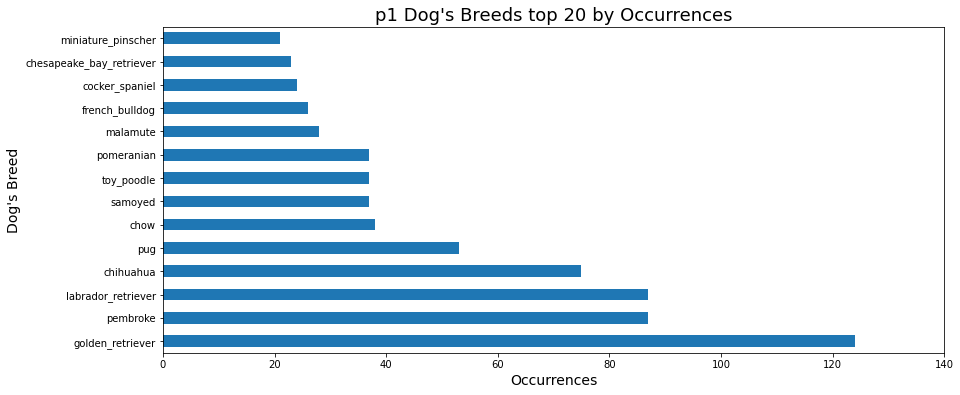

In [136]:
# Value counts to build a histogram.
p1_count = df[df.p1_dog].p1.value_counts()

# Plotting the graphic.
barchart(p1_count,
           title = 'p1 Dog\'s Breeds top 20 by Occurrences',
           xlabel = 'Occurrences',
           ylabel = 'Dog\'s Breed')

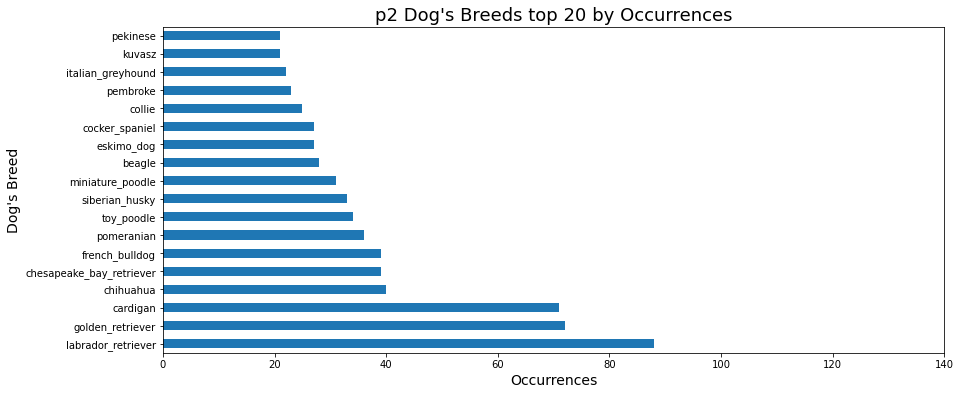

In [137]:
# Value counts to build a histogram.
p2_count = df[df.p2_dog].p2.value_counts()

# Plotting the graphic.
barchart(p2_count,
           title = 'p2 Dog\'s Breeds top 20 by Occurrences',
           xlabel = 'Occurrences',
           ylabel = 'Dog\'s Breed')

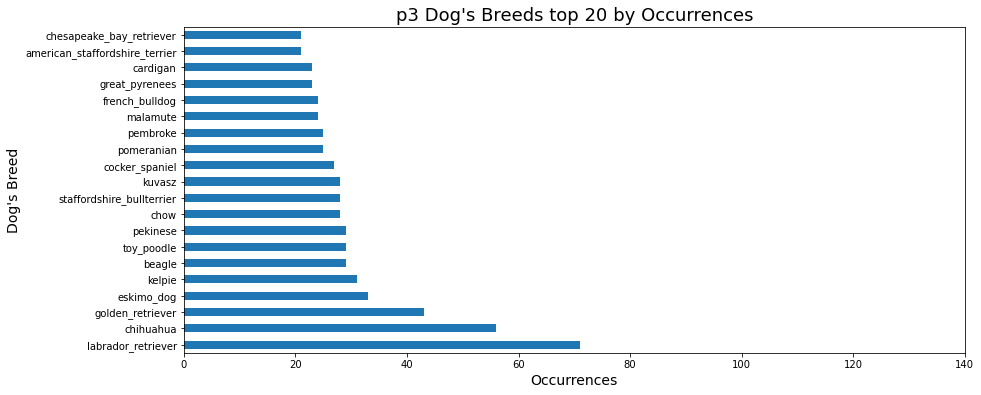

In [138]:
# Value counts to build a histogram.
p3_count = df[df.p3_dog].p3.value_counts()

# Plotting the graphic.
barchart(p3_count,
           title = 'p3 Dog\'s Breeds top 20 by Occurrences',
           xlabel = 'Occurrences',
           ylabel = 'Dog\'s Breed')

* Count of dog breeds whos value counts > 30.

In [139]:
p1_count = sum(df[df.p1_dog].p1.value_counts() >= 30)
p2_count = sum(df[df.p2_dog].p2.value_counts() >= 30)
p3_count = sum(df[df.p3_dog].p3.value_counts() >= 30)

# Printing a summary of occurrences.
print("P1: {} breeds.\nP2: {} breeds.\nP3: {} breeds.".format(p1_count, p2_count, p3_count))

P1: 9 breeds.
P2: 10 breeds.
P3: 5 breeds.


* Quantity of dog breeds from the above subset

In [140]:
dog_qty_20_p1 = sum(df[df.p1_dog].p1.value_counts()[df[df.p1_dog].p1.value_counts() >= 30])
dog_qty_20_p2 = sum(df[df.p2_dog].p2.value_counts()[df[df.p2_dog].p2.value_counts() >= 30])
dog_qty_20_p3 = sum(df[df.p3_dog].p3.value_counts()[df[df.p3_dog].p3.value_counts() >= 30])

# Printing a summary of occurencies.
print("P1: {} dogs.\nP2: {} dogs.\nP3: {} dogs.".format(dog_qty_20_p1,dog_qty_20_p2,dog_qty_20_p3))

P1: 575 dogs.
P2: 483 dogs.
P3: 234 dogs.


* Correlation between Favorite and Retweet, which is expected to be strong positive

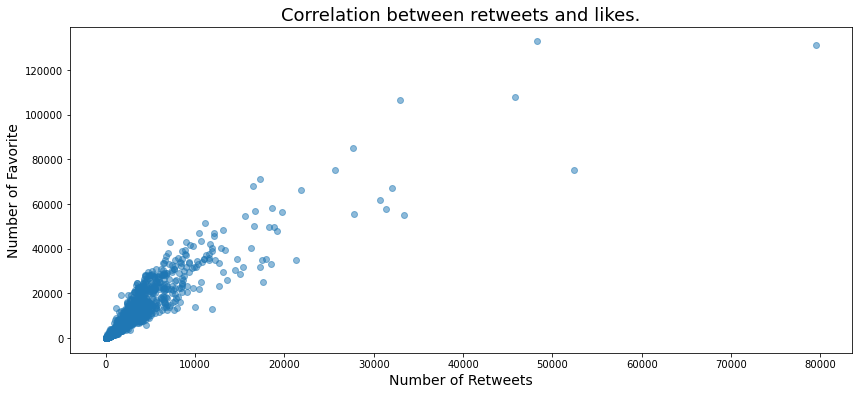

In [141]:
plt.figure(figsize= [14,6])
plt.scatter(x = df['retweet_count'],
            y = df['favorite_count'],
            alpha = 0.5)
plt.xlabel('Number of Retweets', fontsize = 14)
plt.ylabel('Number of Favorite', fontsize = 14)
plt.title('Correlation between retweets and likes.',
          fontsize = 18)
plt.show()

In [142]:
# Calculating favorite to retweet ratio
fav_ret_ratio = df.favorite_count/df.retweet_count

# Calculating of mean, standard deviation, etc.
fav_ret_ratio[np.logical_not(df.favorite_count.isnull())].describe()

count    1905.000000
mean        3.376836
std         1.159007
min         1.097147
25%         2.562963
50%         3.200000
75%         3.977317
max        11.986559
dtype: float64

In [143]:
df_like_rt = df[['favorite_count','retweet_count']]

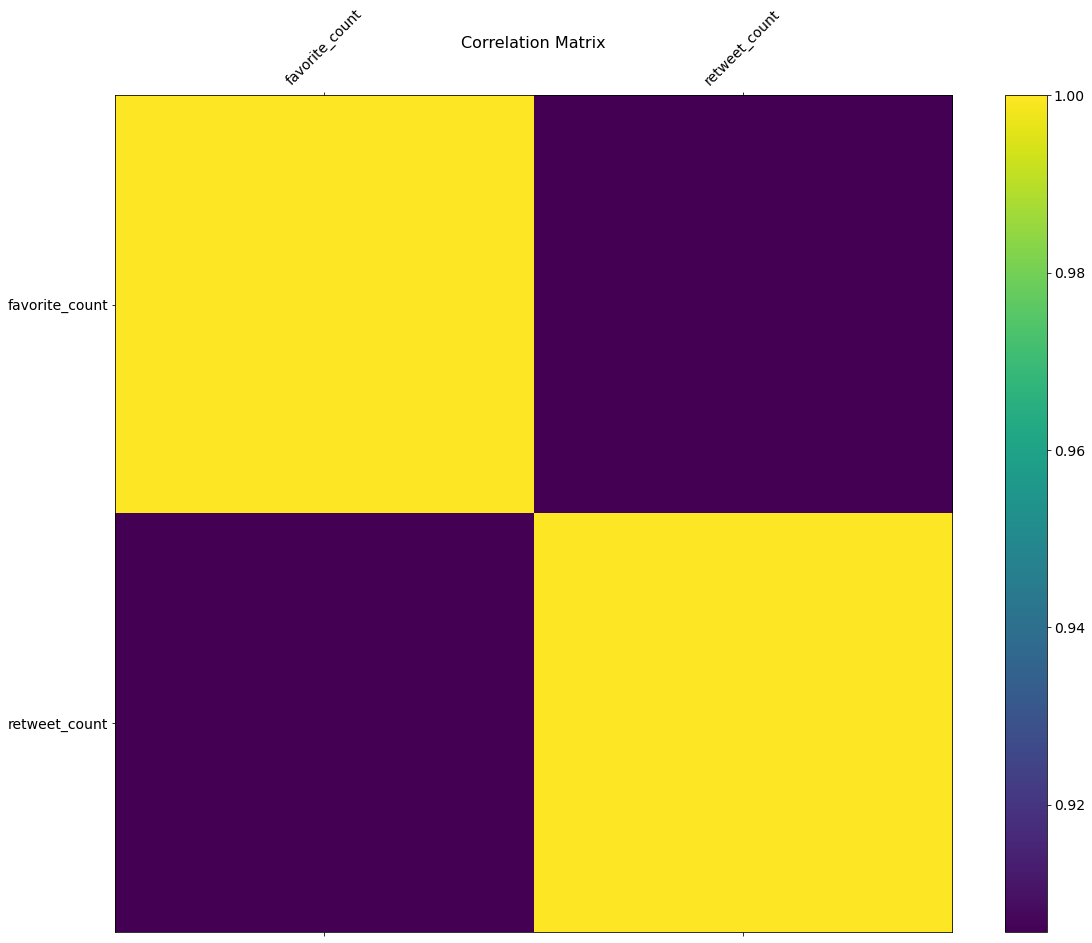

In [144]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_like_rt.corr(), fignum=f.number)
plt.xticks(range(df_like_rt.shape[1]), df_like_rt.columns, fontsize=14, rotation=45)
plt.yticks(range(df_like_rt.shape[1]), df_like_rt.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

* Given above analysis and Visualization, we can confirm our expectations of strong positive correlation between number of likes and retweets

* Tweets Behaviour over the week

In [145]:
df_tw = df.copy()
df_tw['day_of_week'] = df_tw['timestamp'].dt.day_name()
df_tw['month'] = df_tw['timestamp'].dt.month_name()

In [146]:
# reset week
w = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

In [147]:
columns = ['tweet_id','day_of_week','retweet_count','favorite_count']

df_w_count = df_tw[columns].groupby(['day_of_week']).count().reindex(labels=w)
df_w_count

,tweet_id,retweet_count,favorite_count
day_of_week,,,
Monday,318,315,315
Tuesday,286,284,284
Wednesday,287,283,283
Thursday,273,273,273
Friday,267,265,265
Saturday,252,249,249
Sunday,236,236,236


In [148]:
columns = ['tweet_id','day_of_week','rating_numerator']

df_w_mean = df_tw[columns].groupby(['day_of_week']).mean().reindex(labels=w)
df_w_mean

,tweet_id,rating_numerator
day_of_week,,
Monday,735664183072945152,10.364780
Tuesday,738725966088067200,10.576923
Wednesday,736877893773254272,10.414634
Thursday,732146177044972288,10.695971
Friday,739127072294805760,10.640449
Saturday,735055943431656704,10.575397
Sunday,731059037966035712,10.309322


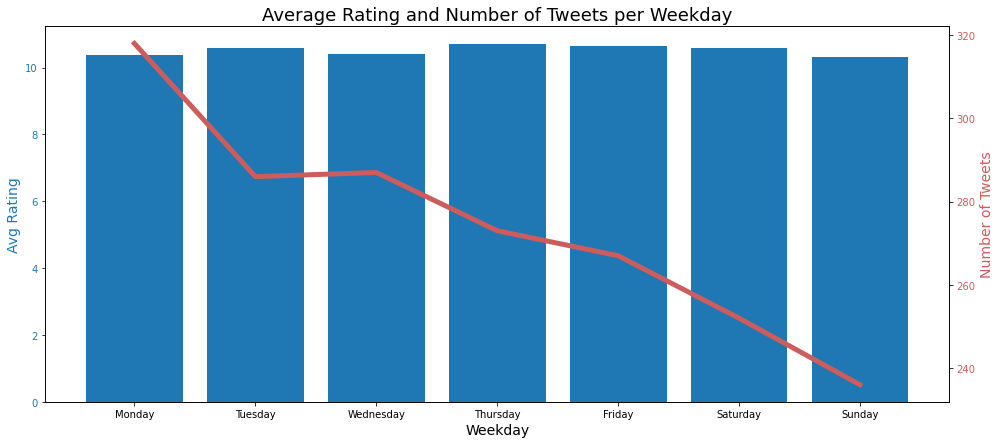

In [149]:
# General configuration for all plots.
font = 14          # X and Y axis fontsize.
font_title = 18    # Graphic's Title fontsize.
transparency = 0.5 # Transparency in cases of scatter plot.
width = 0.7        # Bar width

# Graphic Settings.
fig, ax1 = plt.subplots(figsize = [14,6])

# First Element: Blue bars.
color = 'tab:blue'
ax1.set_xlabel('Weekday', fontsize = font)
ax1.set_ylabel('Avg Rating', color = color, fontsize = font)
ax1.bar(df_w_mean.index, df_w_mean['rating_numerator'], color = color)
ax1.tick_params(axis = 'y', labelcolor = color)

# Second Element: Red line.
ax2 = ax1.twinx()  # share axis with ax1 element.
color = 'indianred'
ax2.set_ylabel('Number of Tweets', color = color, fontsize = font)  # we already handled the x-label with ax1
ax2.plot(df_w_count.index, df_w_count['tweet_id'], color = color, linewidth = 5)
ax2.tick_params(axis = 'y', labelcolor = color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Average Rating and Number of Tweets per Weekday',                # Graphic title.
          fontsize = font_title)   # Graphic font title.
plt.show()

In [150]:
# reset month
m = ['January','February', 'March', 'April','May','June', 'July',
     'August', 'September','October','November','December']

In [151]:
columns = ['tweet_id','month','retweet_count','favorite_count']
df_m_count = df_tw[columns].groupby(['month']).count().reindex(labels=m)
df_m_count

,tweet_id,retweet_count,favorite_count
month,,,
January,223,223,223
February,169,168,168
March,165,162,162
April,94,92,92
May,98,96,96
June,122,121,121
July,134,133,133
August,58,57,57
September,55,54,54


In [152]:
columns = ['month','rating_numerator']
df_m_mean = df_tw[columns].groupby(['month']).mean().reindex(labels=m)
df_m_mean

,rating_numerator
month,
January,10.654709
February,10.852071
March,10.981818
April,11.297872
May,11.714286
June,10.991803
July,11.455224
August,11.017241
September,11.127273


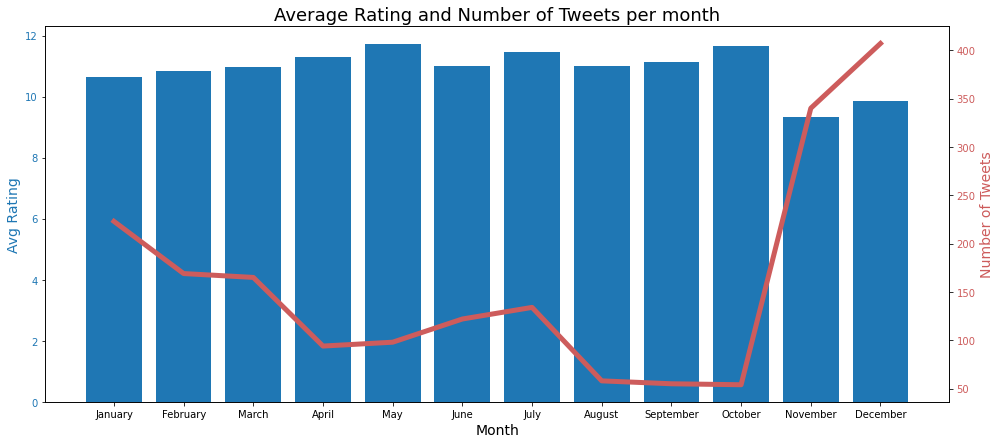

In [153]:
# General configuration for all plots.
font = 14          # X and Y axis fontsize.
font_title = 18    # Graphic's Title fontsize.
transparency = 0.5 # Transparency in cases of scatter plot.
width = 0.7        # Bar width

# Graphic Settings.
fig, ax1 = plt.subplots(figsize = [14,6])

# First Element: Blue bars.
color = 'tab:blue'
ax1.set_xlabel('Month', fontsize = font)
ax1.set_ylabel('Avg Rating', color = color, fontsize = font)
ax1.bar(df_m_mean.index, df_m_mean['rating_numerator'], color = color)
ax1.tick_params(axis = 'y', labelcolor = color)

# Second Element: Red line.
ax2 = ax1.twinx()  # share axis with ax1 element.
color = 'indianred'
ax2.set_ylabel('Number of Tweets', color = color, fontsize = font)  # we already handled the x-label with ax1
ax2.plot(df_m_count.index, df_m_count['tweet_id'], color = color, linewidth = 5)
ax2.tick_params(axis = 'y', labelcolor = color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Average Rating and Number of Tweets per month',                # Graphic title.
          fontsize = font_title)   # Graphic font title.
plt.show()

_______________________________________________

# PART THREE: Reporting

_______________________________________________

## Imported Libraries

The following libraries were imported:
1. import pandas as pd
2. import numpy as np
3. import matplotlib.pyplot as plt
4. import seaborn as sns 
5. import tweepy
6. %matplotlib inline

_______________________________________________

## Data Wrangling Report

_______________________________________________

### Gathering

I have read from the following files:

|File Name|DataFrame|
|---|---|
|twitter-archive-enhanced.csv|twitter_archive_df|
|tweet_json.txt|tweet_json_df|
|image-predictions.tsv|image_predictions_df|

_______________________________________________

### Assessing

_______________________________________________

#### General

1. `twitter_archive_df` size is 2356, while `tweet_json_df` has 2354 (2 less rows) and `image_predictions_df` has 2075 (281 less rows)
2. all three df's are connected in `twitter_archive_df.tweet_id`, `tweet_json_df.id`, and `image_predictions_df.tweet_id`

_______________________________________________

#### twitter_archive_df

##### Quality issues

###### Visually Assessment:
1. `name` column has non-standard lowercase values to be investigated programmatically 
2. < 1% of `rating_denominator` != 10.
3. < 2% of `rating_numerator` is > 14.
4. `source` column has the HTML tags, URL, and content all together.

###### Programmatic Assessment:
5.  `tweet_id` dtype is int (not str)
6. `timestamp` is in object format
7. `name` column contains 745 "None" values
8. `name` column contains 25 unique invalid lowercase names (total = 109 values) using regex search with str.contains.
9. `in_reply_to_status_id` and `in_reply_to_user_id` have only 78/2356 non-null values with 96.7% missing data
10. `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp` have only 181/2356 non-null values with 92% missing data
11. 380 rows only have dogs classified breed into four categories:
    * `doggo`
    * `floofer`
    * `pupper`
    * `puppo`
    
##### Tidiness issues

###### Programmatic Assessment:
1. The following columns is a subclass of `name` column:
    * `doggo`
    * `floofer`
    * `pupper`
    * `puppo`
2. The following columns concerning replies (out of scope):
    * `in_reply_to_status_id`
    * `in_reply_to_user_id`
3. The following columns concerning retweets (out of scope):
    * `retweeted_status_id`
    * `retweeted_status_user_id`
    * `retweeted_status_timestamp`

_______________________________________________

#### tweet_json_df

##### Quality issues

###### Visually Assessment:
1. `id` dtype is int (not str)
2. Duplicated columns `id` and `id_str`
3. Note: `in_reply_to_status_id` and `in_reply_to_status_id_str` columns has the same values, e.g. duplicate 
4. Note: `in_reply_to_user_id` and `in_reply_to_user_id_str` columns has the same values, e.g. duplicate 
5. `favorited` column has two values: True and False
6. `retweeted` column has one value: False
7. `is_quote_status` if True refers to quoting tweets (irrelevant). 
8. `lang` column has 7 unique values

###### Programmatic Assessment:
9. `extended_entities` has 281 null values == missing rows in image predictions.
10. The following column has only (False) value:
    * `retweeted`
    * `truncated`
11. The following columns is out of interest as they concern quoted tweets:    
    * `quoted_status_id`
    * `quoted_status_id_str`
    * `quoted_status`
12. The following columns has almost empty data:
    * `geo` (empty)
    * `coordinates`
    * `place`
    * `contributors`
13. The following colums has 9 unique values yet with data dtype == object (not categorical)
    * `lang`
14. `retweeted_status` if notnull() refers to RT tweets (irrelevant)

##### Tidiness issues

###### Visually Assessment:
1. `source` column contains more than one data.

###### Programmatic Assessment:
2. The following columns concerning replies, retweets, likes, sensitivities, quotes, location, or languages which are out of scope:
    * `in_reply_to_status_id`
    * `in_reply_to_status_id_str`
    * `in_reply_to_user_id`
    * `in_reply_to_user_id_str`
    * `in_reply_to_screen_name`
    * `retweet_count`
    * `favorited`
    * `possibly_sensitive`
    * `ossibly_sensitive_appealable`
    * `retweeted_status`
3. 179 rows with non-null values of `retweeted_status` where also `favorite_count` == 0 vs. considerable number of retweets!

_______________________________________________

#### image_predictions_df

##### Quality issues
###### Programmatic Assessment:
1. `jpg_url` has duplicated values (links to images) and consequently double entry, e.g. RT @dog_rates: 
2. `tweet_id` dtype is int (not str)

##### Tidiness issues
###### Visually Assessment:
1. `p1`, `p2`, and `p3` are not using standard format, e.g. some lowercase, other title case, some _ seperated or - or space

###### Programmatic Assessment:
2. Zero missing data but has 281 less rows

### Cleaning

All comments have been addressed and rectified using the three steps:
* Define
* Code
* Test
over the course of cleaning section of this report.

After that, we merged the three dataframes into a single DF named `master_twitter_archive_df` which Undergone a second stage of assessing and cleaning before storing, analyzing and vizualizing.

_______________________________________________

## Storing, Analyzing, and Visualizing Data Report

### Storing

The master DF data was exported into a single csv file named:
* twitter_archive_master.csv

|File Name|DataFrame|
|---|---|
|twitter_archive_master.csv|df|

### Analyzing

* Statistical analysis through describe
* count by unique values
* mean success rates per image prediction algorithm 
* grouby and aggregate tweets count, RT/Likes sum and rating mean

### Visualizing

We have visualized the following characteristics:
* value counts of unique dog breed prediction, e.g. p1, p2, and p3
* total number of dog breeds with unique value counts of +30
* total quantity of above count
* correlation between retweets and likes in scatter plot
* correlation between retweets and likes in Correlation matrix
* trends of tweets counts, RT/likes sum, rating mean over the course of weekdays and months